# **Task-5: To explore Business Analytics**
 You are the business owner of the retail firm and want to see
how your company is performing. You are interested in finding
out the weak areas where you can work to make more profit.
What all business problems you can derive by looking into the
data?

# **Submission By:- Madhav Sharma**


In [2]:
#importing  essential libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import plotly.express as px
import plotly.graph_objs as go
from plotly.subplots import make_subplots

import warnings
warnings.filterwarnings('ignore')
%matplotlib inline


In [2]:
from plotly import __version__
print(__version__)

4.8.1


In [3]:
!pip install cufflinks


In [4]:
import cufflinks as cf

In [5]:
from plotly.offline import download_plotlyjs,init_notebook_mode,plot, iplot

init_notebook_mode(connected=True)

cf.go_offline()

In [6]:
df=pd.read_csv('SampleSuperstore.csv')


In [7]:
df.head()



,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


## **Data Analysis**

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Ship Mode     9994 non-null   object 
 1   Segment       9994 non-null   object 
 2   Country       9994 non-null   object 
 3   City          9994 non-null   object 
 4   State         9994 non-null   object 
 5   Postal Code   9994 non-null   int64  
 6   Region        9994 non-null   object 
 7   Category      9994 non-null   object 
 8   Sub-Category  9994 non-null   object 
 9   Sales         9994 non-null   float64
 10  Quantity      9994 non-null   int64  
 11  Discount      9994 non-null   float64
 12  Profit        9994 non-null   float64
dtypes: float64(3), int64(2), object(8)
memory usage: 1015.1+ KB


In [9]:
df.isnull().sum()

Ship Mode       0
Segment         0
Country         0
City            0
State           0
Postal Code     0
Region          0
Category        0
Sub-Category    0
Sales           0
Quantity        0
Discount        0
Profit          0
dtype: int64

In [10]:
df.shape

(9994, 13)

In [11]:
df.dtypes

Ship Mode        object
Segment          object
Country          object
City             object
State            object
Postal Code       int64
Region           object
Category         object
Sub-Category     object
Sales           float64
Quantity          int64
Discount        float64
Profit          float64
dtype: object

In [12]:
#Checking if any duplicate row is there in the dataset
df.duplicated().sum()

17

In [13]:
#Removing 17 duplicated rows to avoid faults in further calculation
df.drop_duplicates(inplace=True)

In [14]:
df.shape

(9977, 13)

In [15]:
df['Country'].nunique()

1

In [16]:
df['Postal Code']

0       42420
1       42420
2       90036
3       33311
4       33311
        ...  
9989    33180
9990    92627
9991    92627
9992    92627
9993    92683
Name: Postal Code, Length: 9977, dtype: int64

In [17]:
df[['Sales','Profit','Discount']].describe()

,Sales,Profit,Discount
count,9977.000000,9977.00000,9977.000000
mean,230.148902,28.69013,0.156278
std,623.721409,234.45784,0.206455
min,0.444000,-6599.97800,0.000000
25%,17.300000,1.72620,0.000000
50%,54.816000,8.67100,0.200000
75%,209.970000,29.37200,0.200000
max,22638.480000,8399.97600,0.800000


## **Data Visualization**

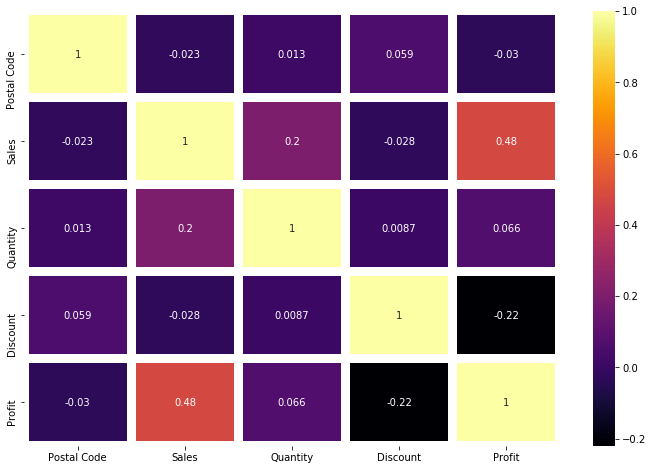

In [18]:
#Checking correlation between columns visually
f,ax = plt.subplots(figsize=(12, 8))
sns.heatmap(df.corr(),annot=True,cmap='inferno',lw=8,linecolor='white' )

In [19]:
#What are the numbers of unique entries in the Categorical columns
for col in df.columns:
    if df[col].dtype=='object':
        print("Number of unique entries in",col + " are",df[col].nunique())
        print("=================================================")

Number of unique entries in Ship Mode are 4
Number of unique entries in Segment are 3
Number of unique entries in Country are 1
Number of unique entries in City are 531
Number of unique entries in State are 49
Number of unique entries in Region are 4
Number of unique entries in Category are 3
Number of unique entries in Sub-Category are 17


In [20]:
df.iplot(x="Region", y="Sales",kind='bar',title='Region VS Sales',xTitle='Region',yTitle='Sales')

### Observation:
The West region is leading the sales followed by the East, South and North.¶

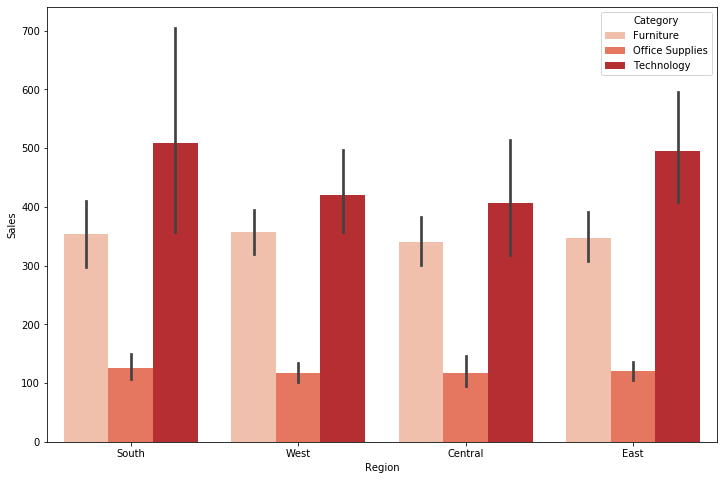

In [21]:
#Category wise sales in Each region
plt.figure(figsize=[12,8])
ax = sns.barplot(x="Region", y="Sales", hue="Category", data=df, palette="Reds")

### Observation:
In each and every every region, sales for 'Office Supplies' are very poor. Furniture and Technology are well ahead

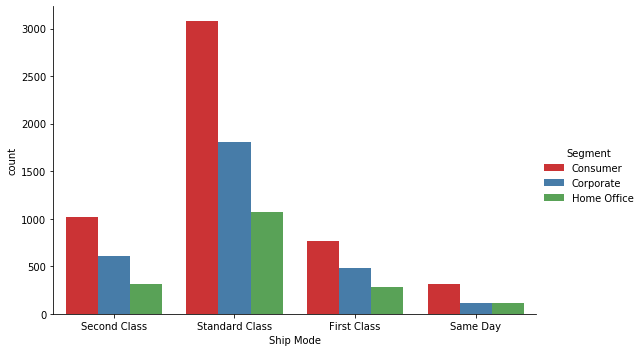

In [22]:
#Segment wise count of the ship modes
sns.catplot("Ship Mode", hue="Segment", data=df, kind="count", aspect=1.5, palette="Set1")

### Observation:
No much surprises here. Consumer count is highest in each case and they generally prefer 'Standard Class'

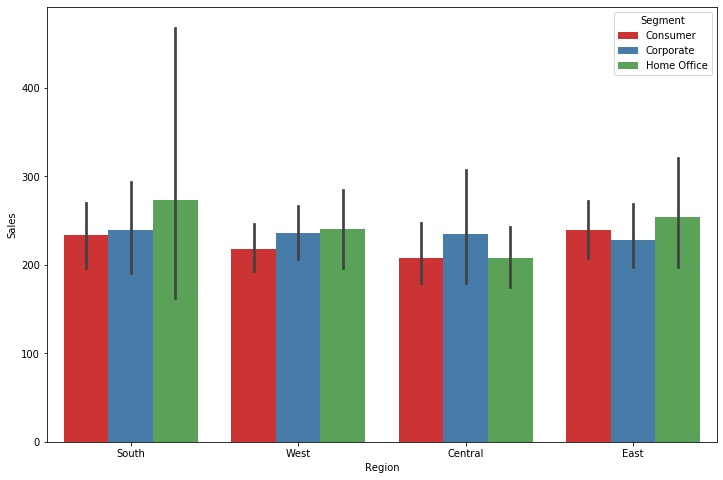

In [23]:
#Segment wise sales in Each region
plt.figure(figsize=[12,8])
ax = sns.barplot(x="Region", y="Sales", hue="Segment", data=df, palette="Set1")

### Observation:
In case of sales not much difference is seen based on the Segments for any region. Overall 'Corporate' is leading a bit

In [24]:
df.iplot(x="Sub-Category", y="Sales",kind='bar',colors='blue',title='Sub_Category VS Sales',xTitle='Sub_Category',yTitle='Sales')

### Observation:
Sales of Sub Categories such as Chairs and phones are much higher than any other item.

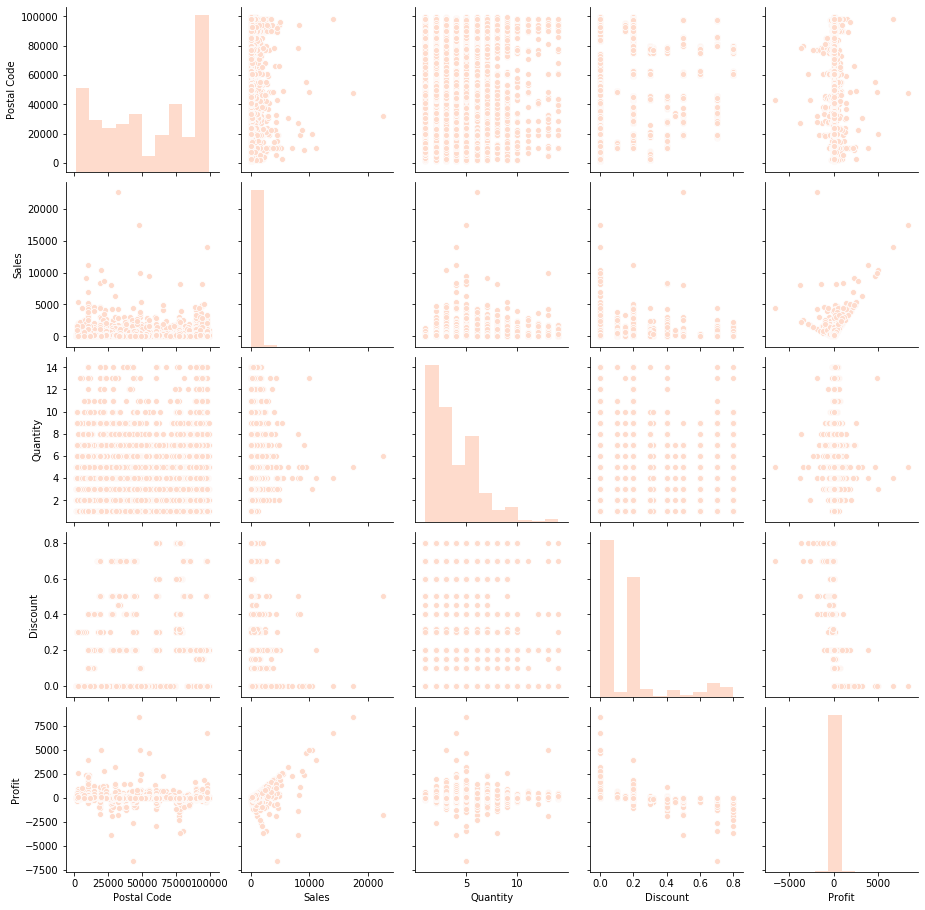

In [25]:
#Let's get some aggregated views from pairplot
sns.set_palette('Reds')
sns.pairplot(df)

No such relations are found between columns of the dataset

# Analyse the Products at Sub-Category level

In [26]:
fig = px.sunburst(df,path=['Country','Category','Sub-Category'],
                 values='Sales',color='Category',
                 hover_data =['Sales','Quantity','Profit'])
fig.update_layout(height=1000,title_text='Product Categories & Sub-Categories')
fig.show()

## Region & Sub-Category wise Profit Analysis 

Text(0, 0.5, 'Profit')

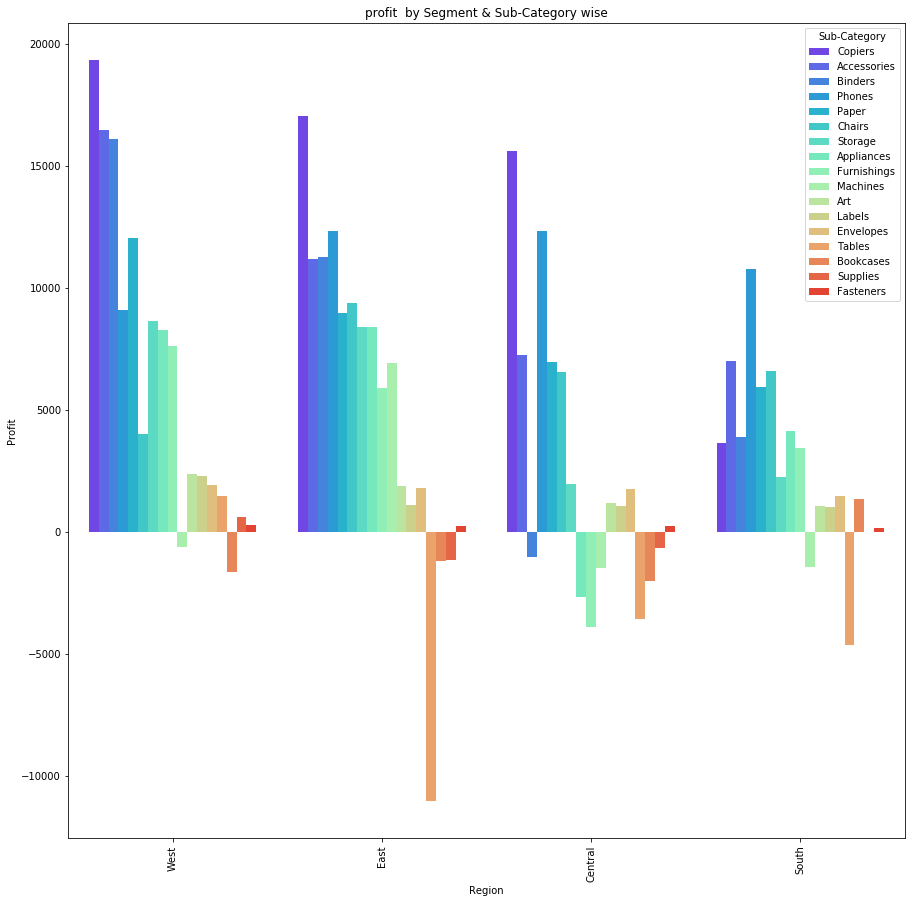

In [27]:
fig=plt.figure(figsize=(15,15))
sale_Products = df.groupby(["Region","Sub-Category"])['Profit'].aggregate(np.sum).reset_index().sort_values('Profit',ascending = False)
sns.barplot(x = "Region", y= "Profit" ,hue='Sub-Category',data=sale_Products,palette='rainbow')
plt.title('profit  by Segment & Sub-Category wise')
plt.xlabel('Region')
plt.xticks(rotation=90)
plt.ylabel('Profit')

## Regionwise Profit Analysis:-
From Above graph we can easily interpret that West region gives higest profit among all others.We should increase Sales price of 'Bookcases' in West region.

To increase Profit of East region We have to increase Sales price of 'Tables','Bookcases' and 'Supplies'.

For Central region enhance prices of 'Furnishing', 'Machines', 'Appliances', 'Table', 'Bookcases' and 'Supplies'.

For South region increment in 'Tables' and 'Machines'.

## States by Sales Volume

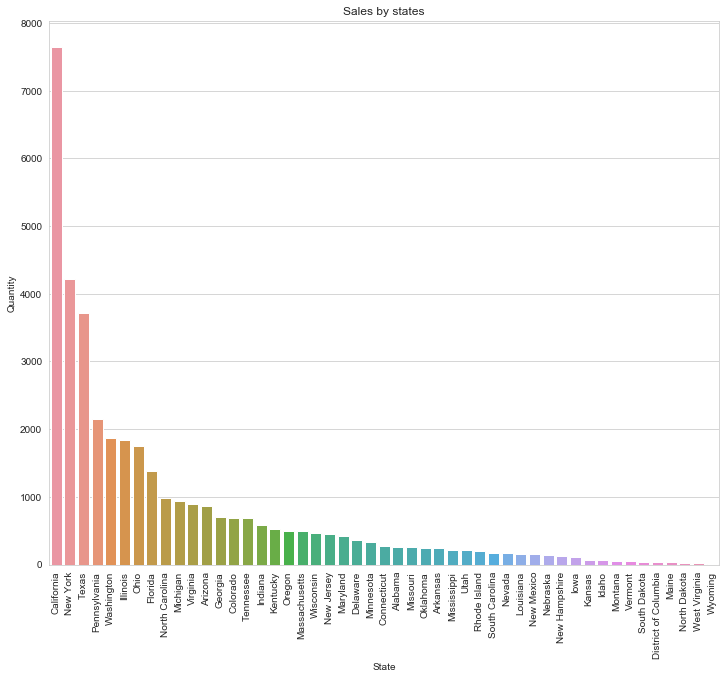

In [28]:
fig = plt.figure(figsize=(12,10))
sns.set_style('whitegrid')
sale_cities = df.groupby(["State"])['Quantity'].aggregate(np.sum).reset_index().sort_values('Quantity',ascending = False).head(50)
sns.barplot(x = "State",y= "Quantity",data=sale_cities)
plt.title("Sales by states")
plt.xticks(rotation=90)
plt.show()

### City-Wise Sales


In [29]:
temp = df[['State','City','Sales']].groupby(['State','City'])['Sales'].sum().reset_index()
fig = px.treemap(temp,path=['State','City'], values='Sales')
fig.update_layout(height=1000,title='City-wise Sales',)
                 #color_discrete_sequence = px.colors.qualitative.Plotly)
fig.data[0].textinfo = 'label+text+value'
fig.show()
 


## Above graph indicates-

1.Which city and state has how much sales

2.Size of a tile indicates corresponding sales

### Top Selling Sub-Categories

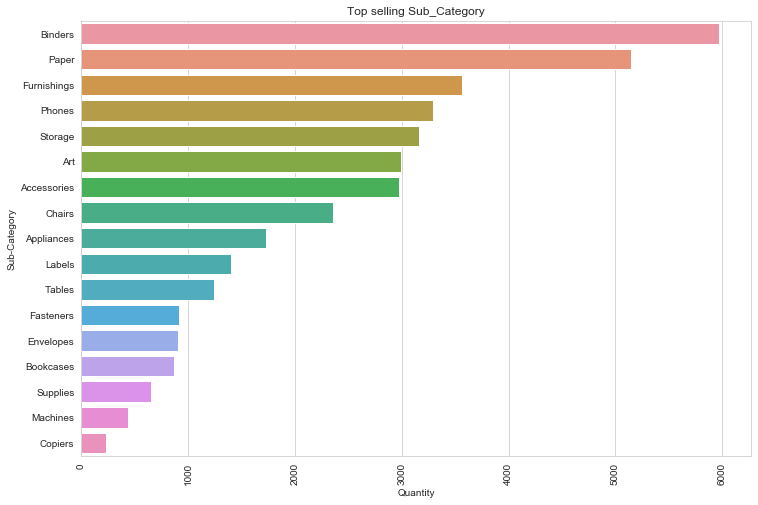

In [30]:
#Top Selling Sub-Category
fig=plt.figure(figsize=(12,8))
sale_SubCategory = df.groupby(["Sub-Category"])['Quantity'].aggregate(np.sum).reset_index().sort_values('Quantity',ascending = False).head(20)
sns.barplot(x = "Quantity",y= "Sub-Category",  data=sale_SubCategory)
plt.title('Top selling Sub_Category')
plt.xticks(Rotation=90)
plt.show()

 We can said that Binders is having high Demand followed by Paper,Furnishings,Phones.

### Sales & Profit of each Sub-Category

In [31]:
d = []
for i in df['Sub-Category'].unique():
    sales = round(df[df['Sub-Category']==i]['Sales'].sum(),2)
    profit = round(df[df['Sub-Category']==i]['Profit'].sum(),2)
    d.append([i,sales,profit])
temp = pd.DataFrame(d,columns=['Sub-Category','Sales','Profit'])
temp = temp.sort_values('Sales',ascending=True)

fig = go.Figure(data=[go.Bar(name='Sales',x=temp['Sales'],y=temp['Sub-Category'],orientation='h',marker_color = 'green'),
                      go.Bar(name='Profit',x=temp['Profit'],y=temp['Sub-Category'],orientation='h',marker_color = 'navy')])
fig.update_layout(template='simple_white',title='Sales & Profit of each Sub-Category',height=700) #barmode='stack'
fig.show()

### Region-Wise Product Sales

In [32]:
# df[(df['Region']=='South') & (df['Sub-Category']=='Binders')]
fig = go.Figure(data=[go.Bar(name=region,x=df['Sub-Category'],y=df[df['Region']==region]['Sales'],marker_color=color) for region,color in zip(df.Region.unique(),['red','navy','green','brown'])])
fig.update_layout(barmode='group',template='simple_white',title='Region-wise Sub-Category products Sales')
fig.show()

## State Wise Profit Analysis

Text(0, 0.5, 'Profit')

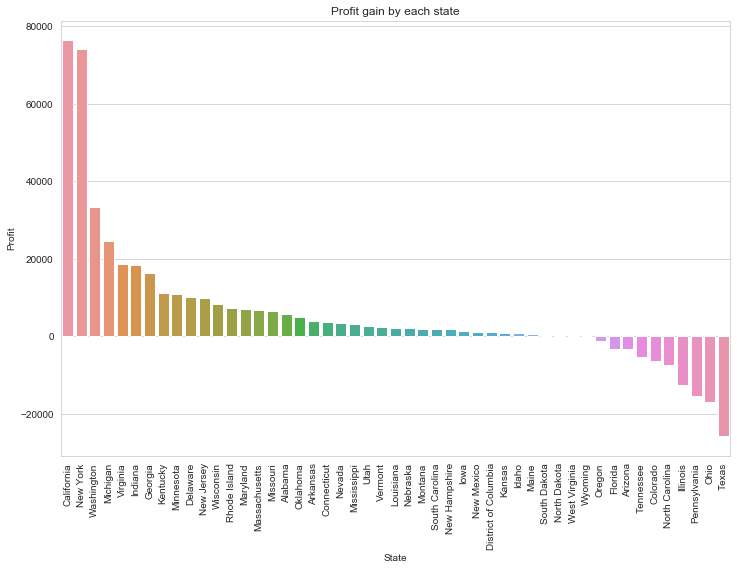

In [33]:
fig=plt.figure(figsize=(12,8))
profit_States = df.groupby(["State"])['Profit'].aggregate(np.sum).reset_index().sort_values('Profit',ascending = False)
profit_States
sns.barplot(x = "State", y= "Profit" ,data=profit_States)
plt.title('Profit gain by each state')
plt.xticks(rotation=90)
plt.xlabel('State')
plt.ylabel('Profit')

#### 1. Out of 49 states 5 gives no profit and no loss.The States are Maine,South Dakota,North Dakota,West Virginia,Wyoming.
#### 2. The States Oregon ,Florida,Arizona,Tennessee,Colorado,North Carolina,illinois,Pennsylvania,Ohio,Texas gives Loss.Texas gives maximum Loss of 25729.3563.

### Profit by Category wise

Text(0, 0.5, 'Profit')

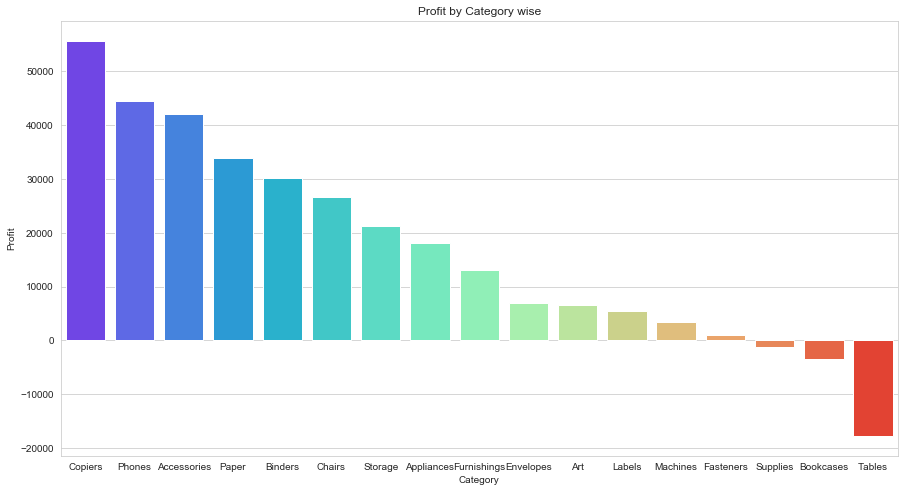

In [34]:
fig=plt.figure(figsize=(15,8))
sale_Products = df.groupby(["Sub-Category"])['Profit'].aggregate(np.sum).reset_index().sort_values('Profit',ascending = False)
sns.barplot(x = "Sub-Category", y= "Profit" ,data=sale_Products,palette='rainbow')
plt.title('Profit by Category wise')
plt.xlabel('Category')
plt.ylabel('Profit')

 We can observe that maximum loss is given by Tables followed by Bookcases and Supplies

### Quantity sold category and sub-category wise

Text(0, 0.5, 'Quantity')

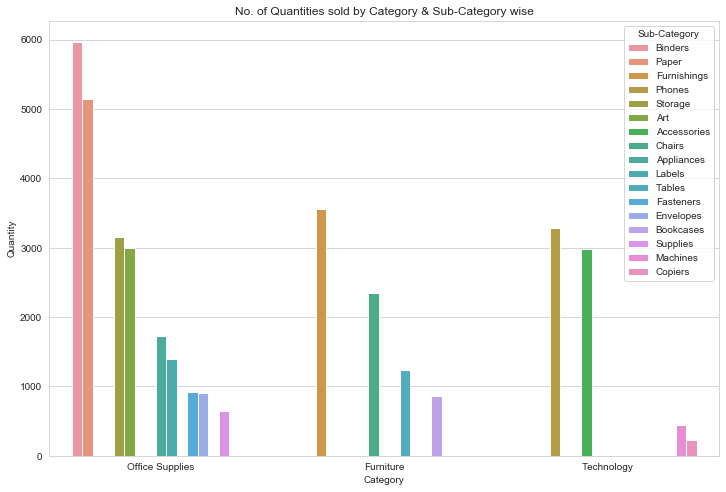

In [35]:
fig=plt.figure(figsize=(12,8))
sale_Products = df.groupby(["Category","Sub-Category"])['Quantity'].aggregate(np.sum).reset_index().sort_values('Quantity',ascending = False).head(20)
sns.barplot(x = "Category", y= "Quantity",hue='Sub-Category' ,data=sale_Products)
plt.title('No. of Quantities sold by Category & Sub-Category wise')
plt.xlabel('Category')
plt.ylabel('Quantity')

1. The maximum products sold in category Office Supplies followed by Furniture and Techology

2 We Observed that maximum loss is given by Furniture category Specially 'Tables' and 'Bookcases'.So we have to enhance the Sales price of products Table and Bookcases along with it, we also have to lower down the discount given on these two sub-categories. So that we minimize our losses.

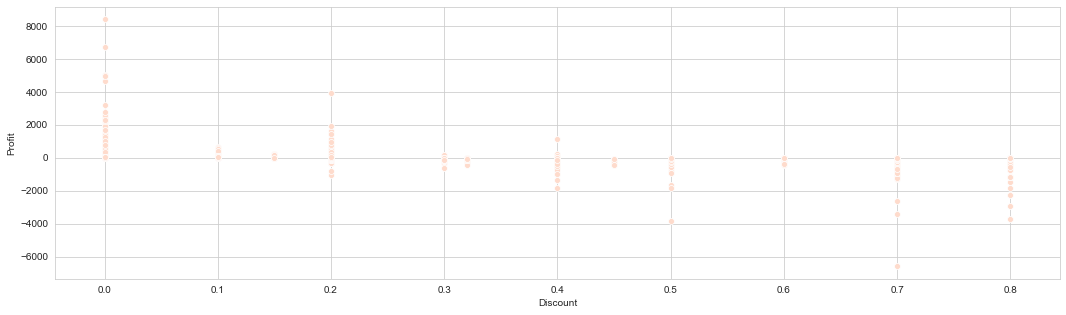

In [36]:
axes,fig=plt.subplots(0,1,figsize=(18,5))
sns.scatterplot("Discount",'Profit',data=df)




**Here it can be observed that when the discount is till 0.3, there is a profit.**

**But if the discount increases beyond 0.3 there is a loss happening**




## **Analyze the Geography**

In [37]:
df.groupby(['State'])['Sales'].nunique().sort_values(ascending=False)

State
California              1534
New York                 961
Texas                    847
Pennsylvania             522
Washington               461
Illinois                 460
Ohio                     439
Florida                  356
Michigan                 239
North Carolina           236
Arizona                  216
Virginia                 210
Colorado                 179
Tennessee                176
Georgia                  175
Indiana                  146
Kentucky                 137
Massachusetts            129
New Jersey               129
Oregon                   119
Wisconsin                110
Maryland                 104
Delaware                  94
Minnesota                 86
Connecticut               80
Missouri                  64
Oklahoma                  64
Alabama                   61
Arkansas                  58
Rhode Island              54
Mississippi               53
Utah                      53
Louisiana                 40
South Carolina            40
Nevada  

In [38]:
!pip install geopy

In [39]:
from geopy.exc import GeocoderTimedOut 
from geopy.geocoders import Nominatim 

In [40]:
# grouping data total sales and profit state wise
StatewiseSalesAndProfit = df.groupby("State").agg({"Sales":np.sum, "Profit": np.sum,"Quantity":np.sum,"Discount":np.sum}).reset_index().sort_values('Profit',ascending = False)
StatewiseSalesAndProfit

,State,Sales,Profit,Quantity,Discount
3,California,457576.2715,76330.7891,7649,145.60
30,New York,310827.1510,74015.4622,4220,62.40
45,Washington,138560.8100,33368.2375,1871,32.40
20,Michigan,75879.6440,24428.0903,943,1.80
44,Virginia,70636.7200,18597.9504,893,0.00
12,Indiana,53555.3600,18382.9363,578,0.00
9,Georgia,49095.8400,16250.0433,705,0.00
15,Kentucky,36591.7500,11199.6966,523,0.00
21,Minnesota,29863.1500,10823.1874,331,0.00
6,Delaware,27451.0690,9977.3748,367,0.60


#### Where our customers are?

In [41]:
CitywiseSalesAndProfit = df.groupby("City").agg({"Sales":np.sum, "Profit": np.sum,"Quantity":np.sum,"Discount":np.sum}).reset_index().head(200)
CitywiseSalesAndProfit

,City,Sales,Profit,Quantity,Discount
0,Aberdeen,25.5000,6.6300,3,0.00
1,Abilene,1.3920,-3.7584,2,0.80
2,Akron,2729.9860,-186.6356,65,7.50
3,Albuquerque,2220.1600,634.0881,65,0.80
4,Alexandria,5519.5700,318.6183,84,0.00
...,...,...,...,...,...
195,Hendersonville,319.5380,-45.3867,22,2.00
196,Hesperia,1213.1715,98.5269,18,0.55
197,Hialeah,2338.9490,-179.2275,76,5.20
198,Hickory,40.7640,-1.0956,5,0.90


### **Statewise Sales,quantity,discount and profit analysis**

In [42]:
longitude = [] 
latitude = [] 
def findGeocode(City): 
       
     
    try: 
          
         
        geolocator = Nominatim(user_agent="your_app_name") 
          
        return geolocator.geocode(City) 
      
    except GeocoderTimedOut: 
          
        return findGeocode(City)

In [43]:
for i in (StatewiseSalesAndProfit["State"]): 
      
    if findGeocode(i) != None: 
           
        loc = findGeocode(i) 
          
       
        latitude.append(loc.latitude) 
        longitude.append(loc.longitude) 
       
    
    else: 
        latitude.append(np.nan) 
        longitude.append(np.nan)     

StatewiseSalesAndProfit["Longitude"] = longitude 
StatewiseSalesAndProfit["Latitude"] = latitude  
StatewiseSalesAndProfit

,State,Sales,Profit,Quantity,Discount,Longitude,Latitude
3,California,457576.2715,76330.7891,7649,145.60,-118.755997,36.701463
30,New York,310827.1510,74015.4622,4220,62.40,-74.006015,40.712728
45,Washington,138560.8100,33368.2375,1871,32.40,-77.036571,38.894985
20,Michigan,75879.6440,24428.0903,943,1.80,-84.682435,43.621195
44,Virginia,70636.7200,18597.9504,893,0.00,-78.492772,37.123224
12,Indiana,53555.3600,18382.9363,578,0.00,-86.174693,40.327013
9,Georgia,49095.8400,16250.0433,705,0.00,-83.113737,32.329381
15,Kentucky,36591.7500,11199.6966,523,0.00,-85.155141,37.572603
21,Minnesota,29863.1500,10823.1874,331,0.00,-94.611329,45.989659
6,Delaware,27451.0690,9977.3748,367,0.60,-75.401331,38.692045


In [45]:
!pip install folium


In [46]:
# let's import folium  and creates base map
import folium 
import webbrowser
# latitude and longitude of United States.
latitude = 37.0902
longitude = -95.7129
US_map = folium.Map(location=[latitude, longitude], zoom_start=5)
colordict = {0: 'lightgreen', 1: 'red'}

In [47]:
# Main purpose of this function is to color circlemarkers green and red as the gives profit and loss respectively.
def color(profit): 
    if profit>0: 
        col = 'green'
    else: 
        col='red'
    return col

In [49]:
from IPython.display import display
for lat, lon, state, sales,qty,discount, profit in zip(StatewiseSalesAndProfit['Latitude'], StatewiseSalesAndProfit['Longitude'], StatewiseSalesAndProfit['State'], StatewiseSalesAndProfit['Sales'],StatewiseSalesAndProfit['Quantity'],StatewiseSalesAndProfit['Discount'], StatewiseSalesAndProfit['Profit']):
    folium.CircleMarker(
        location=[lat, lon],
        radius=5,
        popup = ('State: ' + str(state).capitalize() + '<br>'
                 'Sales: ' + str(sales) + '<br>'+'Quantity: ' + str(qty)+ '<br>'+'Discount: ' + str(discount)+ '<br>'
                 'Profit: ' + str(profit) ),
        color='b',
        fill_color=color(profit),
        fill=True,
        fill_opacity=0.7
        ).add_to(US_map)
    
#US_map.save("US_map.html")
display(US_map)

**Citywise Sales,quantity,discount and profit analysis**

In [50]:
longitude = [] 
latitude = [] 
def findGeocode(City): 
       
     
    try: 
          
         
        geolocator = Nominatim(user_agent="your_app_name") 
          
        return geolocator.geocode(City) 
      
    except GeocoderTimedOut: 
          
        return findGeocode(City)

In [51]:
for i in (CitywiseSalesAndProfit["City"]): 
      
    if findGeocode(i) != None: 
           
        loc = findGeocode(i) 
          
       
        latitude.append(loc.latitude) 
        longitude.append(loc.longitude) 
       
    
    else: 
        latitude.append(np.nan) 
        longitude.append(np.nan)     

CitywiseSalesAndProfit["Longitude"] = longitude 
CitywiseSalesAndProfit["Latitude"] = latitude  
CitywiseSalesAndProfit

,City,Sales,Profit,Quantity,Discount,Longitude,Latitude
0,Aberdeen,25.5000,6.6300,3,0.00,-2.092809,57.148243
1,Abilene,1.3920,-3.7584,2,0.80,-99.747591,32.446450
2,Akron,2729.9860,-186.6356,65,7.50,-81.518485,41.083064
3,Albuquerque,2220.1600,634.0881,65,0.80,-106.650985,35.084103
4,Alexandria,5519.5700,318.6183,84,0.00,29.894378,31.199004
...,...,...,...,...,...,...,...
195,Hendersonville,319.5380,-45.3867,22,2.00,-82.460953,35.318728
196,Hesperia,1213.1715,98.5269,18,0.55,-117.300878,34.426389
197,Hialeah,2338.9490,-179.2275,76,5.20,-80.278106,25.857596
198,Hickory,40.7640,-1.0956,5,0.90,-93.333475,37.959055


In [52]:
import folium 
import webbrowser
# latitude and longitude of United States.
latitude = 37.0902
longitude = -95.7129
City_map = folium.Map(location=[latitude, longitude], zoom_start=5)
colordict = {0: 'lightgreen', 1: 'red'}

In [53]:
# Main purpose of this function is to color circlemarkers green and red as the gives profit and loss respectively.
def color(profit): 
    if profit>0: 
        col = 'green'
    else: 
        col='red'
    return col

In [54]:
for lat, lon, city, sales,qty,discount, profit in zip(CitywiseSalesAndProfit['Latitude'], CitywiseSalesAndProfit['Longitude'], CitywiseSalesAndProfit['City'], CitywiseSalesAndProfit['Sales'],CitywiseSalesAndProfit['Quantity'],CitywiseSalesAndProfit['Discount'], CitywiseSalesAndProfit['Profit']):
    folium.CircleMarker(
        location=[lat, lon],
        radius=5,
        popup = ('City: ' + str(city).capitalize() + '<br>'
                 'Sales: ' + str(sales) + '<br>'+'Quantity: ' + str(qty)+ '<br>'+'Discount: ' + str(discount)+ '<br>'
                 'Profit: ' + str(profit) ),
        color='b',
        fill_color=color(profit),
        fill=True,
        fill_opacity=0.7
        ).add_to(City_map)
    
#US_map.save("US_map.html")
City_map

### **Final Conclusions:**

#### **Ship Mode:-** 


*   The profit is high when the ship mode is "Standard Class" and the Profit is negligible when the ship Mode is "Same day"
*   Our focus should be on Same Day Shipment Mode

#### **Segment:-**


*   We have enhanced our profit by increasing Sales Price of 'Table','BookCases' and 'Supplies' in Consumer Segment
* There is a huge loss from the furniture section

#### **State:-**

*  California has highest no. of Customers followed by New York ,Texas.etc  
*  Out of 49 states 5 gives no profit and no loss.The States are Maine,South Dakota,North Dakota,WestVirginia,Wyoming.

*  So we have to focus on the States having least no. of Customers like West Virgina,Wyoming, North Dakota  So we have to focus on these states to increase number of Customers or distribution of our products. 
*  We have to focus on states giving loss to the company Texas,Orego ,Florida,Arizona,Tennessee,Colorado,North Carolina,illinois,Pennsylvania,Ohio,Texas 


#### **Region:-**


*   The profit is more from the west region of the country.
*   To increase Profit of East region We have to increase Sales price of 'Tables','Bookcases' and 'Supplies'.

*   For Central region enhance prices of,'Accessories','Furnishing', 'Machines', 'Appliances', 'Table', 'Bookcases' and    'Supplies'.
*   For South region increment in sales price of 'Tables' and 'Machines'.

#### **Discount:-**

*  When the discount is till 0.3, there is a profit,But if the discount increases beyond 0.3 there is a loss happening

#### **Category:-**


*   Although office supplies is the most selling category but the profit is highest from the technology sector Under which the the profit has come more from the Consumers segment

#### **Sub-Category:-**

*   Although Copiers is the least selling sub-category but has given the most profit out of all the sub-categories.





















**## SUGGESTIONS TO THE BUSSINESS:**

*1.THE DISCOUNT SHOULD NOT BE INCREASED BEYOND 0.3.*




---




*2.THE FURNITURE CATEGORY IS CAUSING A LOT OF LOSS, SO THE COMPANY CAN STOP SELLING FURNITURES OR SHOULD INCREASE THE PRICE OF THE FURNITURE CATEGORY OR CAN TRY TO REDUCE THE OVERALL COST OF THE PRODUCT*


---


*3.IF THE SHIPPING MODE IS "SAME DAY", THE SHIPPING CHARGES SHOULD BE INCREASED.*


---


*4.THE COMPANY SHOULD FOCUS MORE ON THE TECHNOLOGY SECTION.* 


---

